In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
data = {
	'Режим работы': ['Симметричный', 'Несимметричный', 'Несимметричный', 'Включение'],
	"Uan": [8.78, 8.78, 8.68, 8.89],
	"Ubn": [8.78, 8.76, 8.71, 8.75],
	"Ucn": [8.98, 8.82, 8.81, 8.73],
	"Ia": [88, 2, 55, 63],
	"Ib": [86, 122, 130, 133],
	"Ic": [88, 85, 88, 1],
	"In": [1, 104, 61, 114],
}

df = pd.DataFrame(data)
df

,Режим работы,Uan,Ubn,Ucn,Ia,Ib,Ic,In
0,Симметричный,8.78,8.78,8.98,88,86,88,1
1,Несимметричный,8.78,8.76,8.82,2,122,85,104
2,Несимметричный,8.68,8.71,8.81,55,130,88,61
3,Включение,8.89,8.75,8.73,63,133,1,114


In [30]:
data_2 = {
    "Режим работы": ['Симметричный', 'Несимметричный'],
    "Uan": [8.78, 8.81],
    "Ubn": [8.77, 8.76],
    "Ucn": [8.79, 8.78],
    "Ia": [96, 69],
    "Ib": [93, 103],
    "Ic": [94, 87],
}

df_2 = pd.DataFrame(data_2)
df_2


,Режим работы,Uan,Ubn,Ucn,Ia,Ib,Ic
0,Симметричный,8.78,8.77,8.79,96,93,94
1,Несимметричный,8.81,8.76,8.78,69,103,87


In [40]:
import pandas as pd
import numpy as np

data = {
    'Режим работы': ['Симметричный', 'Несимметричный', 'Несимметричный', 'Включение'],
    "Uan": [8.78, 8.78, 8.68, 8.89],
    "Ubn": [8.78, 8.76, 8.71, 8.75],
    "Ucn": [8.98, 8.82, 8.81, 8.73],
    "Ia": [88, 2, 55, 63],
    "Ib": [86, 122, 130, 133],
    "Ic": [88, 85, 88, 1],
    "In": [1, 104, 61, 114],
}

df = pd.DataFrame(data)

# Углы в градусах
angles = [0, 120, 240]  # Углы для векторов A, B, C

# Вычисление длины векторов и углов
results = []
for index, row in df.iterrows():
    for i, phase in enumerate(['A', 'B', 'C']):
        U = row[f'U{phase.lower()}n']
        I = row[f'I{phase.lower()}']
        angle = angles[i]
        results.append({
            'Режим работы': row['Режим работы'],
            'Фаза': phase,
            'U': U,
            'I': I,
            'Angle (°)': angle,
            'Length': np.sqrt(U**2 + I**2)  # длина вектора
        })

results_df = pd.DataFrame(results)
print(results_df)

      Режим работы Фаза     U    I  Angle (°)      Length
0     Симметричный    A  8.78   88          0   88.436918
1     Симметричный    B  8.78   86        120   86.447027
2     Симметричный    C  8.98   88        240   88.456997
3   Несимметричный    A  8.78    2          0    9.004910
4   Несимметричный    B  8.76  122        120  122.314094
5   Несимметричный    C  8.82   85        240   85.456377
6   Несимметричный    A  8.68   55          0   55.680718
7   Несимметричный    B  8.71  130        120  130.291458
8   Несимметричный    C  8.81   88        240   88.439901
9        Включение    A  8.89   63          0   63.624147
10       Включение    B  8.75  133        120  133.287518
11       Включение    C  8.73    1        240    8.787087


In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Данные
data = {
    'Режим работы': ['Симметричный', 'Симметричный', 'Симметричный', 
                     'Несимметричный', 'Несимметричный', 'Несимметричный', 
                     'Несимметричный', 'Несимметричный', 'Несимметричный', 
                     'Включение', 'Включение', 'Включение'],
    'Фаза': ['A', 'B', 'C', 'A', 'B', 'C', 'A', 'B', 'C', 'A', 'B', 'C'],
    'U': [8.78, 8.78, 8.98, 8.78, 8.76, 8.82, 8.68, 8.71, 8.81, 8.89, 8.75, 8.73],
    'I': [88, 86, 88, 2, 122, 85, 55, 130, 88, 63, 133, 1],
    'Angle (°)': [0, 120, 240, 0, 120, 240, 0, 120, 240, 0, 120, 240],
}

# Создаем DataFrame
df = pd.DataFrame(data)

# Настройка графика
plt.figure(figsize=(10, 8))

# Цвета для каждой фазы
colors = {'A': 'r', 'B': 'g', 'C': 'b'}

# Построение векторов
for index, row in df.iterrows():
    angle_rad = np.deg2rad(row['Angle (°)'])
    U_length = row['U']
    I_length = row['I']
    
    # Вектор напряжения
    plt.quiver(0, 0, U_length * np.cos(angle_rad), U_length * np.sin(angle_rad),
               angles='xy', scale_units='xy', scale=1, color=colors[row['Фаза']], label=f'U{row["Фаза"]}' if index < 3 else "")
    
    # Вектор тока
    plt.quiver(0, 0, I_length * np.cos(angle_rad), I_length * np.sin(angle_rad),
               angles='xy', scale_units='xy', scale=1, color=colors[row['Фаза']], linestyle='dashed', label=f'I{row["Фаза"]}' if index < 3 else "")

# Настройки графика
plt.xlim(-150, 150)
plt.ylim(-150, 150)
plt.axhline(0, color='black',linewidth=0.5, ls='--')
plt.axvline(0, color='black',linewidth=0.5, ls='--')
plt.grid()
plt.title('Векторная диаграмма')
plt.xlabel('Действительная часть')
plt.ylabel('Мнимая часть')
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

ValueError: At least one value in the dash list must be positive

<Figure size 1000x800 with 1 Axes>

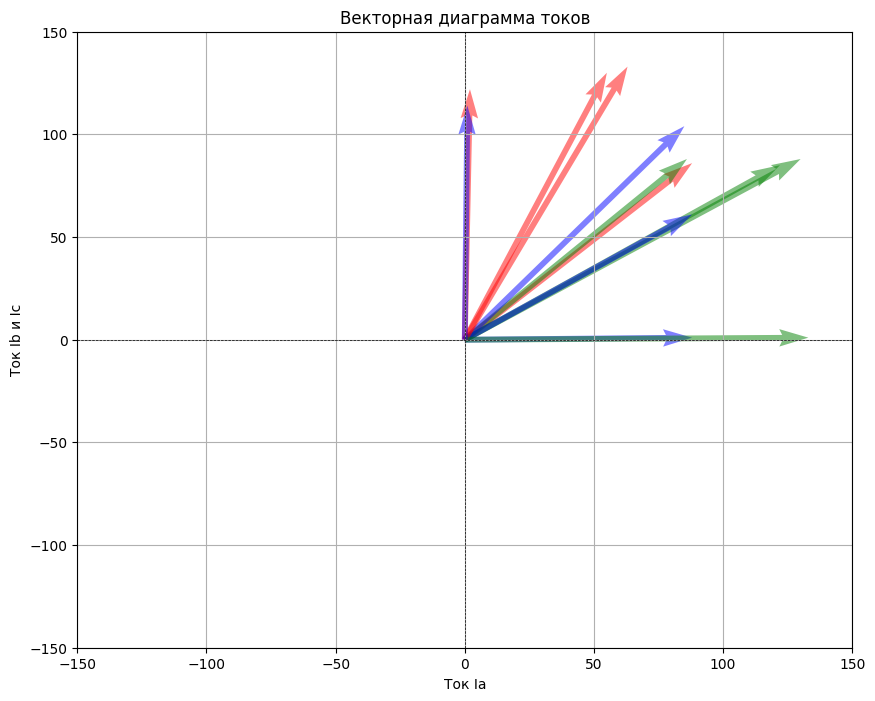

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Данные
data = {
    'Режим работы': ['Симметричный', 'Несимметричный', 'Несимметричный', 'Включение'],
    "Uan": [8.78, 8.78, 8.68, 8.89],
    "Ubn": [8.78, 8.76, 8.71, 8.75],
    "Ucn": [8.98, 8.82, 8.81, 8.73],
    "Ia": [88, 2, 55, 63],
    "Ib": [86, 122, 130, 133],
    "Ic": [88, 85, 88, 1],
    "In": [1, 104, 61, 114],
}

df = pd.DataFrame(data)

# Настройка векторной диаграммы
plt.figure(figsize=(10, 8))

# Углы для векторов токов
angles = np.linspace(0, 2 * np.pi, 4)

# Отображение токов
for i in range(len(df)):
    plt.quiver(0, 0, df['Ia'][i], df['Ib'][i], angles='xy', scale_units='xy', scale=1, color='r', alpha=0.5)
    plt.quiver(0, 0, df['Ib'][i], df['Ic'][i], angles='xy', scale_units='xy', scale=1, color='g', alpha=0.5)
    plt.quiver(0, 0, df['Ic'][i], df['In'][i], angles='xy', scale_units='xy', scale=1, color='b', alpha=0.5)

# Настройка графика
plt.xlim(-150, 150)
plt.ylim(-150, 150)
plt.axhline(0, color='black',linewidth=0.5, ls='--')
plt.axvline(0, color='black',linewidth=0.5, ls='--')
plt.grid()
plt.title('Векторная диаграмма токов')
plt.xlabel('Ток Ia')
plt.ylabel('Ток Ib и Ic')
plt.show()

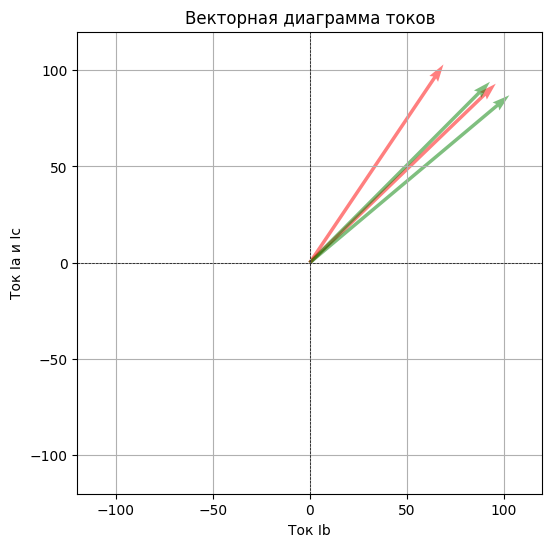

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data_2 = {
    "Режим работы": ['Симметричный', 'Несимметричный'],
    "Uan": [8.78, 8.81],
    "Ubn": [8.77, 8.76],
    "Ucn": [8.79, 8.78],
    "Ia": [96, 69],
    "Ib": [93, 103],
    "Ic": [94, 87],
}

df_2 = pd.DataFrame(data_2)

# Настройка векторной диаграммы
plt.figure(figsize=(6, 6))

# Углы для векторов токов
angles = np.linspace(0, 2 * np.pi, 3)

# Отображение токов
for i in range(len(df_2)):
    plt.quiver(0, 0, df_2['Ia'][i], df_2['Ib'][i], angles='xy', scale_units='xy', scale=1, color='r', alpha=0.5)
    plt.quiver(0, 0, df_2['Ib'][i], df_2['Ic'][i], angles='xy', scale_units='xy', scale=1, color='g', alpha=0.5)

# Настройка графика
plt.xlim(-120, 120)
plt.ylim(-120, 120)
plt.axhline(0, color='black',linewidth=0.5, ls='--')
plt.axvline(0, color='black',linewidth=0.5, ls='--')
plt.grid()
plt.title('Векторная диаграмма токов')
plt.xlabel('Ток Ib')
plt.ylabel('Ток Ia и Ic')
plt.show()

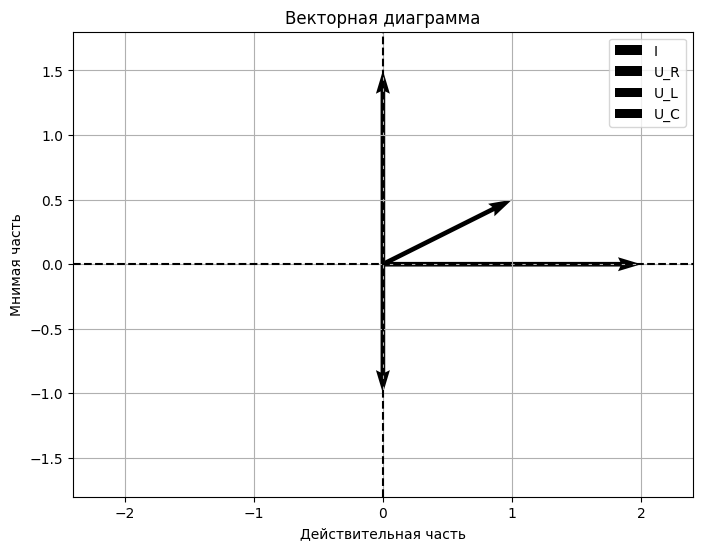

In [36]:
import matplotlib.pyplot as plt
import numpy as np

def plot_vector_diagram(vectors, labels):
    fig, ax = plt.subplots(figsize=(8, 8))
    
    for vector, label in zip(vectors, labels):
        ax.quiver(0, 0, np.real(vector), np.imag(vector), angles='xy', scale_units='xy', scale=1, label=label)
    
    ax.set_xlim([-max(abs(v.real) for v in vectors) * 1.2, max(abs(v.real) for v in vectors) * 1.2])
    ax.set_ylim([-max(abs(v.imag) for v in vectors) * 1.2, max(abs(v.imag) for v in vectors) * 1.2])
    ax.set_xlabel('Действительная часть')
    ax.set_ylabel('Мнимая часть')
    ax.grid(True)
    ax.axhline(y=0, color='k', linestyle='--')
    ax.axvline(x=0, color='k', linestyle='--')
    ax.set_aspect('equal')
    ax.legend()
    plt.title('Векторная диаграмма')
    plt.show()

# Пример использования
I = 1 + 0.5j  # Ток
U_R = 2 + 0j  # Напряжение на резисторе
U_L = 0 + 1.5j  # Напряжение на индуктивности
U_C = 0 - 1j  # Напряжение на емкости

vectors = [I, U_R, U_L, U_C]
labels = ['I', 'U_R', 'U_L', 'U_C']

plot_vector_diagram(vectors, labels)

In [ ]:
def plot_current_diagram(df):
    plt.figure(figsize=(10, 6))
    
    for index, row in df.iterrows():
        # Определяем углы для токов
        angles = [0, -120, 120]  # Углы для трехфазного тока
        currents = [row['Ia'], row['Ib'], row['Ic']]
        
        # Преобразуем векторы в комплексные числа
        complex_currents = [curr * np.exp(1j * np.radians(angle)) for curr, angle in zip(currents, angles)]
        
        # Получаем координаты
        real_parts = [c.real for c in complex_currents]
        imag_parts = [c.imag for c in complex_currents]
        
        # Замыкаем контур
        real_parts.append(real_parts[0])
        imag_parts.append(imag_parts[0])
        
        plt.plot(real_parts, imag_parts, marker='o', label=f'Режим {row["Режим работа цепи"]}' if index == 0 else "")
        
        # Добавляем текст
        for i in range(3):
            plt.text(real_parts[i], imag_parts[i], f"I{i+1}: {currents[i]}A", fontsize=12, ha='center')

    plt.title('Векторные диаграммы токов')
    plt.xlabel('Действительная часть (A)')
    plt.ylabel('Мнимая часть (A)')
    plt.axhline(0, color='black',linewidth=0.5, ls='--')
    plt.axvline(0, color='black',linewidth=0.5, ls='--')
    plt.grid()
    plt.legend()
    plt.axis('equal')
    plt.show()

plot_current_diagram(df)